# Misclassification rate

* Misclassification rate = misclassified points / total number of predictions.
* Develop a function that takes the model and the data and computes the misclassifications.
* Take a specific feature and then compute the rate of misclassifications.
* Misclassification rate changes for different values of that feature (quantile/decile binning).
* The quantiles must be those of the feature values in the test dataset.
* The function should provide the list of numbers. Visualization should be in a later step.

In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

from data_exploration import *
from missclassification_visuals import *
from misclassifications2 import *

In [2]:
dataset_names = ("generated", "vehicles", "eeg", "winequality", "defaults")
dataset_files = ["../../datasets/" + dataset_names[x] + ".csv" for x in range(len(dataset_names))]

## Train the classification model (winequality.csv)
A detailed description of this training section is already included in the jupyter notebook **alberginia_issue2_5datasets.ipynb**.

In [3]:
dataset, dataset_name = load_file(dataset_files[3])
dataset = dataset.drop(columns=["quality"])

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5806, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel="linear", decision_function_shape="ovr", class_weight="balanced")
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)

Redefine class of correctly classified test points (to dimiss them) and creates dataset with only misclassifications of test points:

In [4]:
dataset_which_fail = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-fail")
dataset_misclassifications = dataset_which_fail[dataset_which_fail["Miss & Class"] != "> Prediction hit"]

## Total misclassification rate for one feature (winequality.csv)

### Histogram of all points

In [5]:
# Histogram with regular intervals (first item are the counts, second item the box intervals)
total_histogram = np.histogram(dataset_which_fail["alcohol"])
print(total_histogram)

(array([ 13, 359, 594, 436, 449, 390, 216, 250, 101,  36]), array([ 8. ,  8.6,  9.2,  9.8, 10.4, 11. , 11.6, 12.2, 12.8, 13.4, 14. ]))


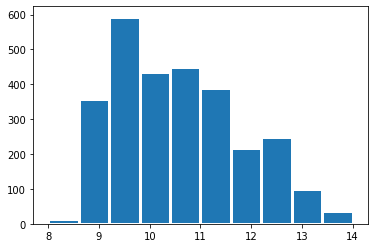

In [6]:
#plt.scatter(misclass_histogram[1], misclass_histogram[0])
figure = plt.bar(total_histogram[1][:-1], total_histogram[0], width= 0.6, bottom=None, align='edge', 
                 edgecolor="white", linewidth=3)

### Histogram of misclassified points

In [7]:
# Histogram with regular intervals (first item are the counts, second item the box intervals)
misclass_histogram = np.histogram(dataset_misclassifications["alcohol"], total_histogram[1])

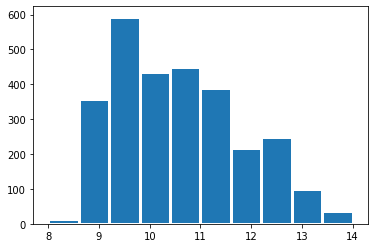

In [8]:
#plt.scatter(misclass_histogram[1], misclass_histogram[0])
figure = plt.bar(misclass_histogram[1][:-1], misclass_histogram[0], width=0.6, bottom=None, align='edge', 
                 edgecolor="white", linewidth=3)

## Function that yields the misclassification rate of a feature

In [12]:
misclass_rate_histogram = misclass_rate_feature(dataset_which_fail, dataset_misclassifications, 
                                                "alcohol")

In [13]:
print(misclass_rate_histogram)

[array([ 8. ,  8.6,  9.2,  9.8, 10.4, 11. , 11.6, 12.2, 12.8, 13.4, 14. ]), [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.5547001962252291, 0.1055559627938519, 0.08206099398622183, 0.09578262852211514, 0.09438583563660174, 0.10127393670836667, 0.13608276348795434, 0.12649110640673517, 0.19900743804199783, 0.3333333333333333]]


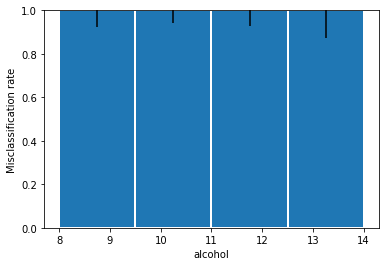

In [16]:
show_misclass_rate_feature(dataset_which_fail, dataset_misclassifications, "alcohol", bins=4)

In [ ]:
misclass_rate_histogram = misclass_rate_feature(dataset_which_fail, dataset_misclassifications, 
                                                "fixed acidity", [3, 6, 9, 15])

In [6]:
print(misclass_rate_histogram)

[array([ 3,  6,  9, 15]), [0.2894736842105263, 0.2902698282910875, 0.25], [0.04474614405959463, 0.016762761734542508, 0.10022296571715915]]


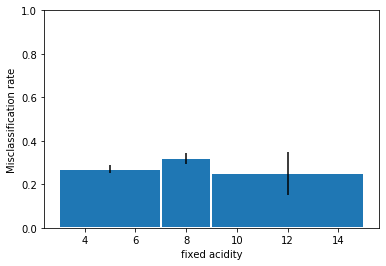

In [7]:
show_misclass_rate_feature(dataset_which_fail, dataset_misclassifications, 
                                                "fixed acidity", [3, 7, 9, 15])

## Misclassification visualization (winequality.csv)

In [11]:
dataset_which_fail = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-fail")

In [47]:
# List of features
feature_list = list(dataset.columns)
print(feature_list)

list(dataset_which_fail.columns)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'recommend']


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'Miss & Class']

[8.0, 9.5, 10.4, 11.4, 14.0]


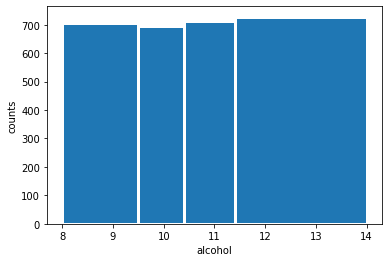

In [12]:
quartiles_alcohol = compute_tiles(dataset_which_fail, "alcohol")
print(quartiles_alcohol)
show_tiles_feature(dataset_which_fail, "alcohol", tiles=4)

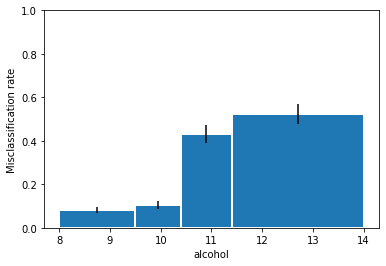

In [13]:
show_misclass_rate_feature(dataset_which_fail, dataset_misclassifications, "alcohol", bins=quartiles_alcohol)

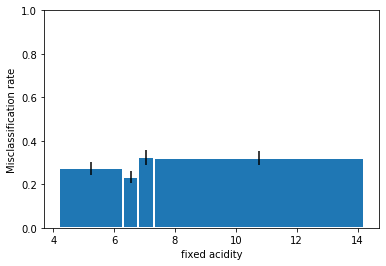

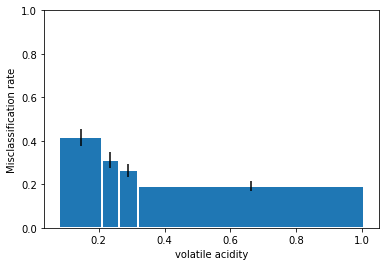

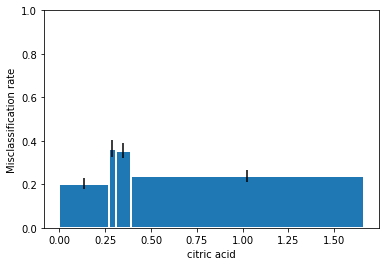

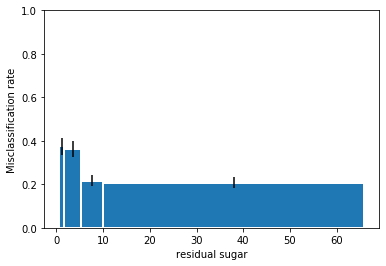

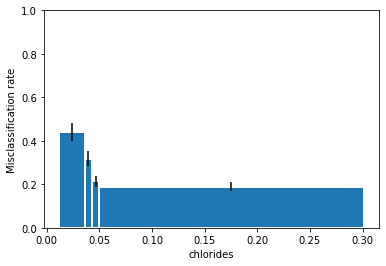

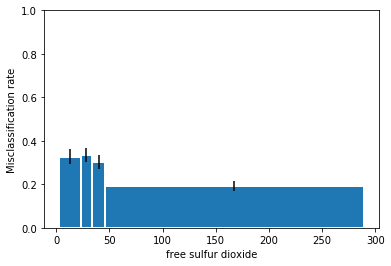

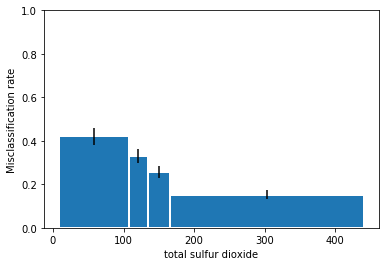

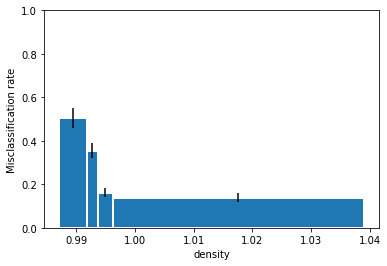

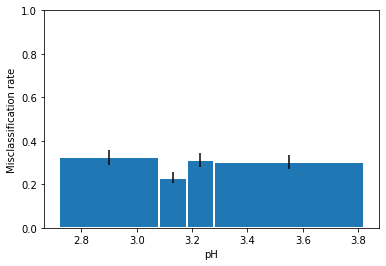

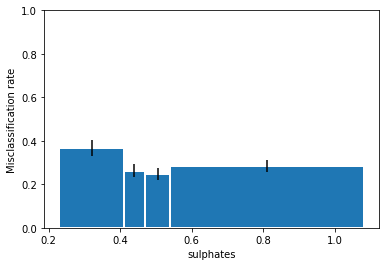

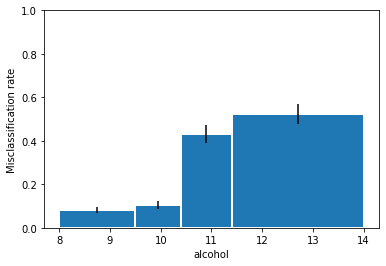

In [6]:
show_misclass_rates_features(dataset_which_fail, dataset_misclassifications, bins="quartiles")

In [11]:
tiles_alcohol = compute_tiles(dataset_which_fail, "alcohol")

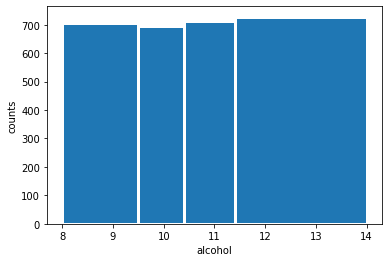

In [10]:
show_tiles_feature(dataset_which_fail, "alcohol", tiles=4)

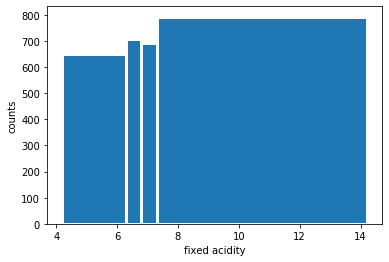

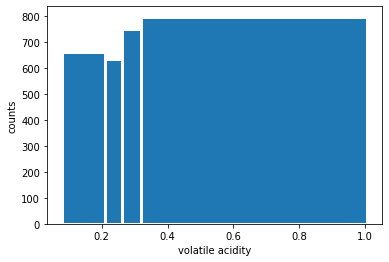

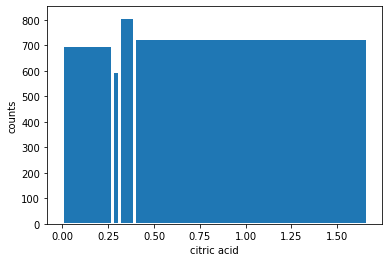

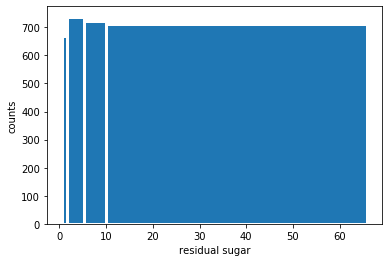

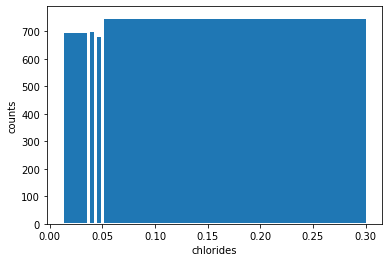

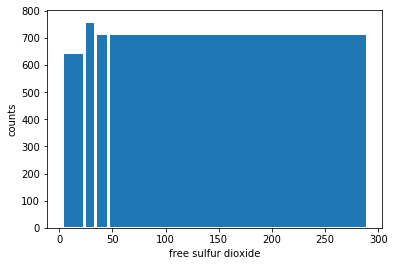

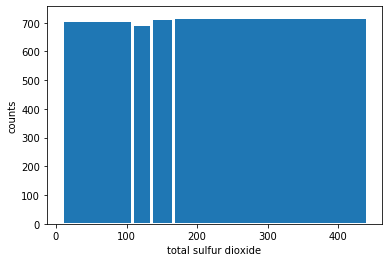

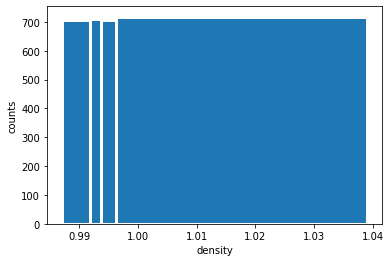

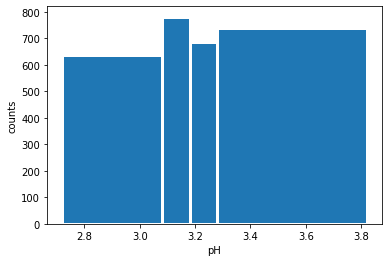

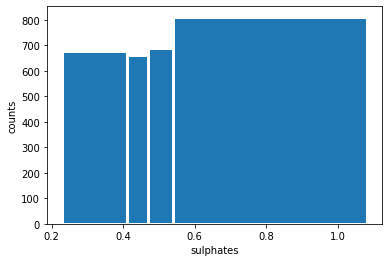

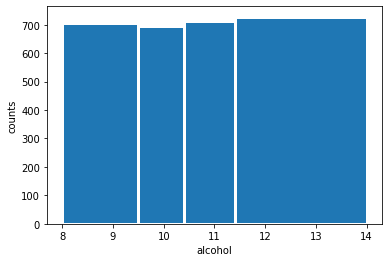

In [7]:
show_tiles_features(dataset_which_fail, tiles="quartiles")

# Vehicles dataset

In [5]:
dataset, dataset_name = load_file(dataset_files[1])

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel='linear', decision_function_shape='ovo')
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)

In [6]:
dataset_which_fail = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-fail")
dataset_misclassifications = dataset_which_fail[dataset_which_fail["Miss & Class"] != "> Prediction hit"]

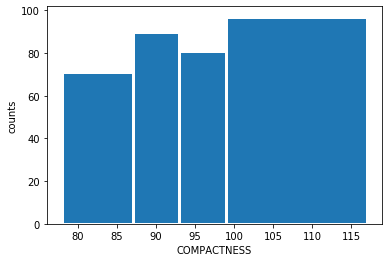

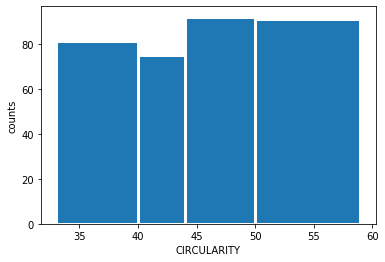

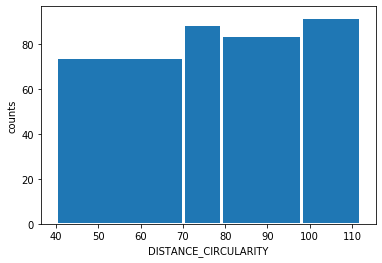

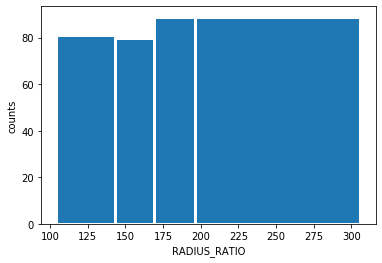

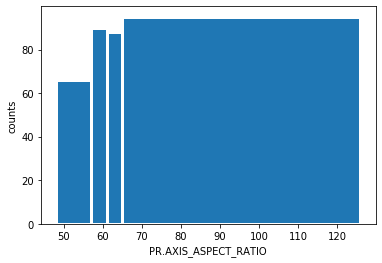

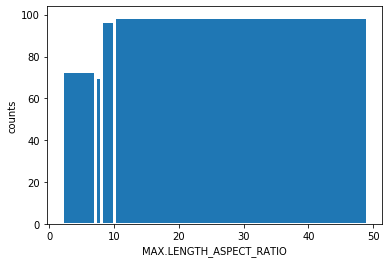

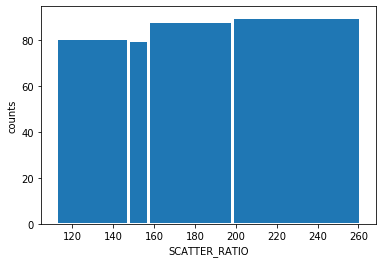

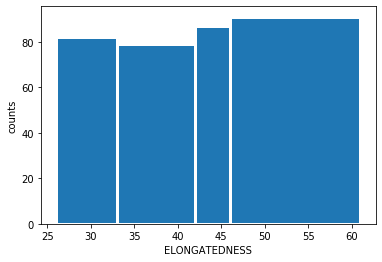

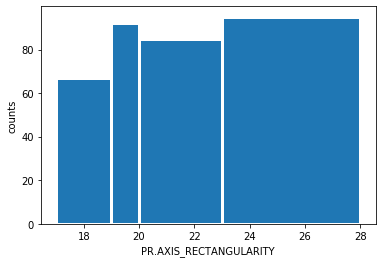

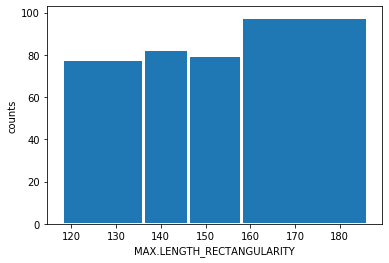

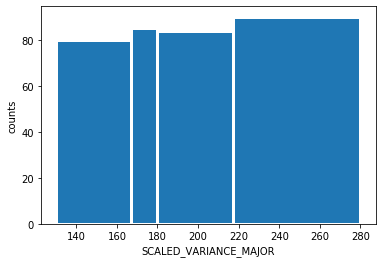

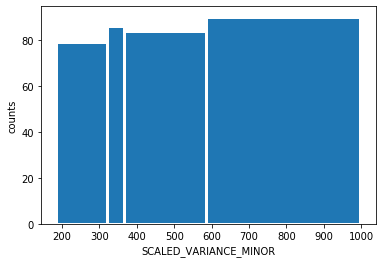

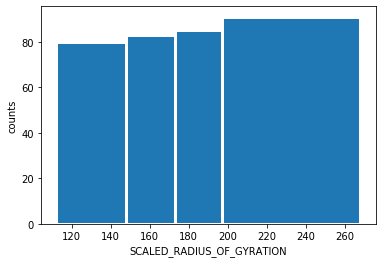

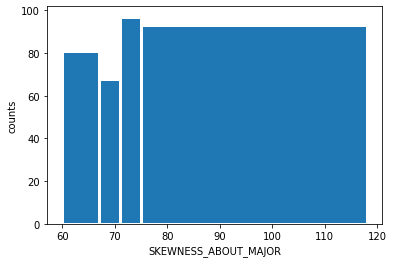

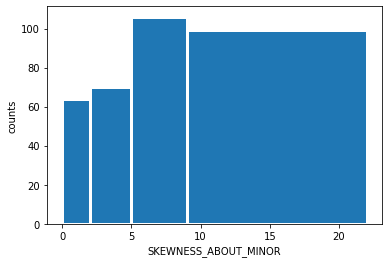

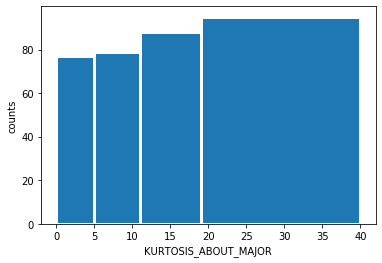

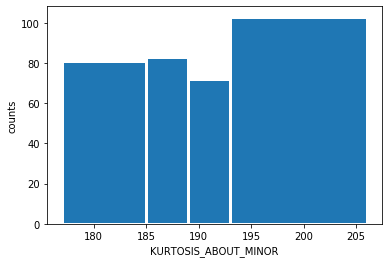

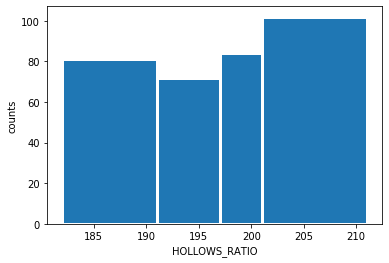

In [7]:
show_tiles_features(dataset_which_fail, tiles=4)

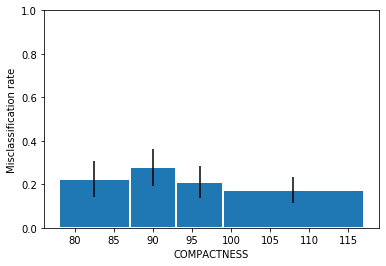

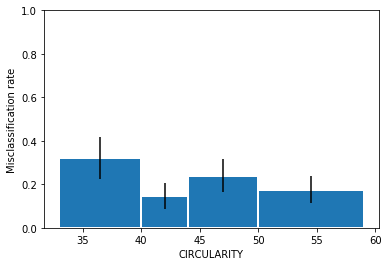

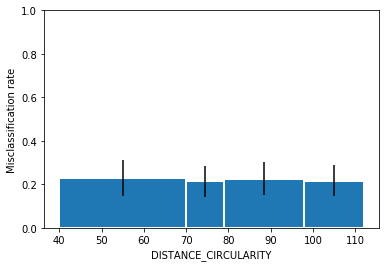

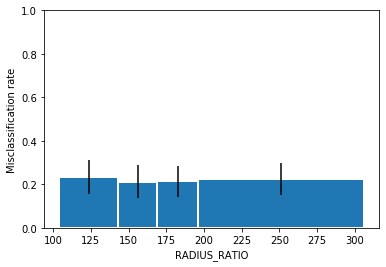

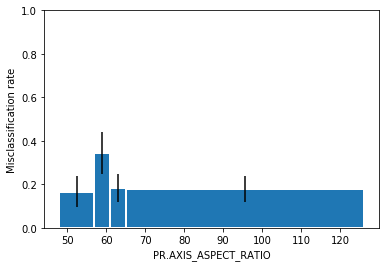

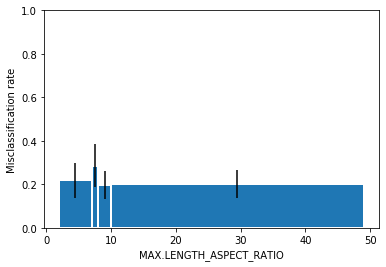

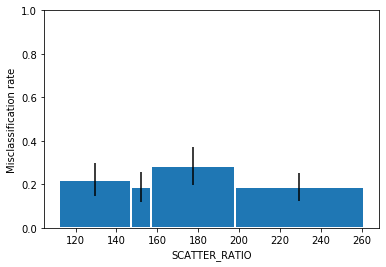

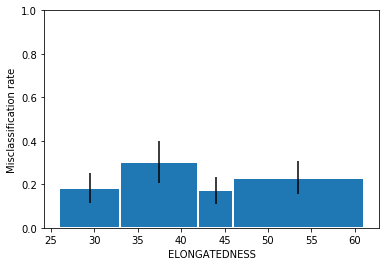

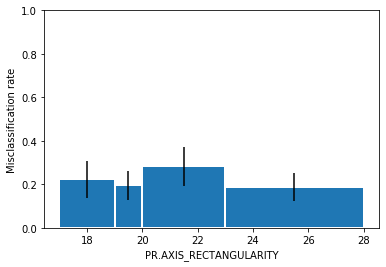

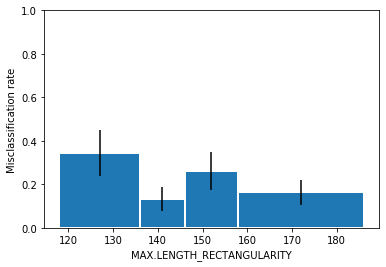

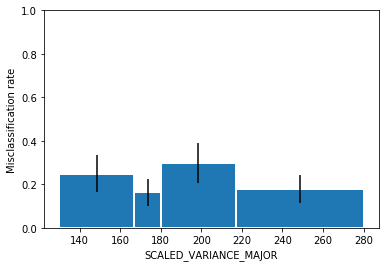

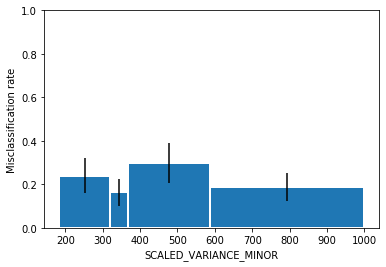

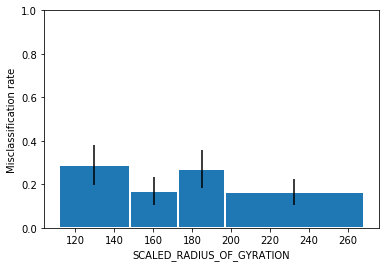

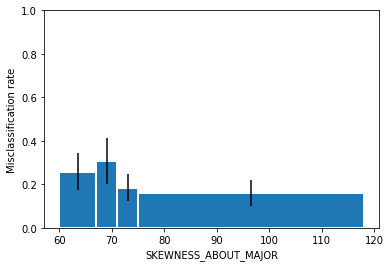

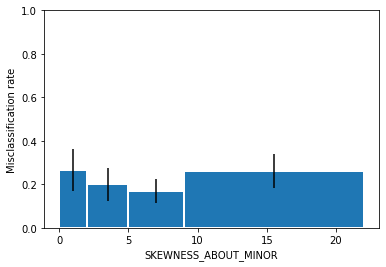

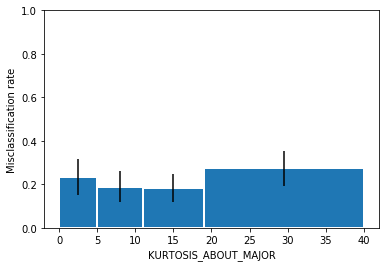

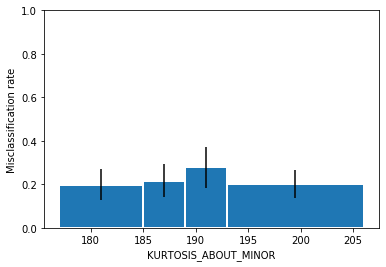

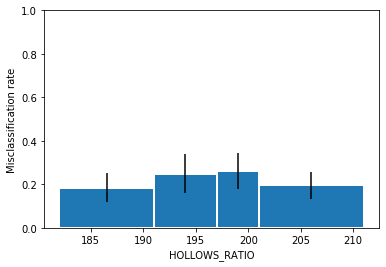

In [8]:
show_misclass_rates_features(dataset_which_fail, dataset_misclassifications, bins="quartiles")

# Defaults dataset

In [9]:
dataset, dataset_name = load_file(dataset_files[4])
# Readjust "pay" values to range from -1 to 9
dataset.iloc[:,6:12] = dataset.iloc[:,6:12].add(1)

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3636, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(kernel="linear", decision_function_shape="ovr", class_weight="balanced")
classifier.fit(X_train_scaled, y_train)
y_predicted = classifier.predict(X_test_scaled)

In [10]:
dataset_which_fail = predictions_to_class(X_test, y_test, y_predicted, new_classes="which-fail")
dataset_misclassifications = dataset_which_fail[dataset_which_fail["Miss & Class"] != "> Prediction hit"]

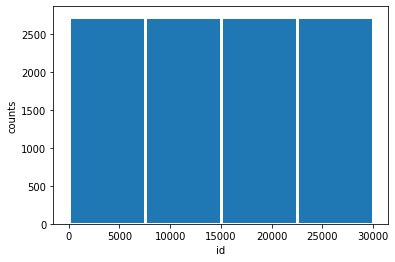

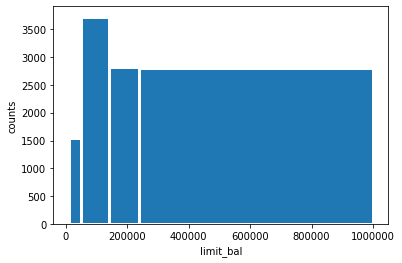

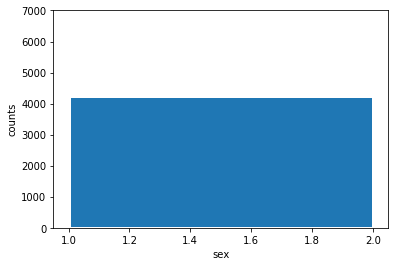

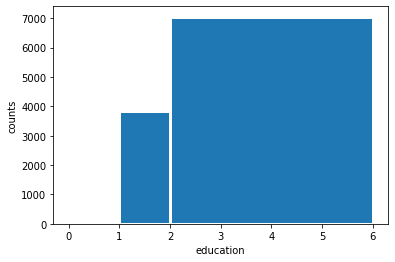

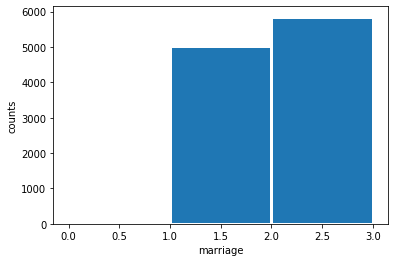

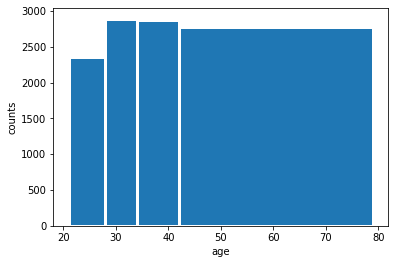

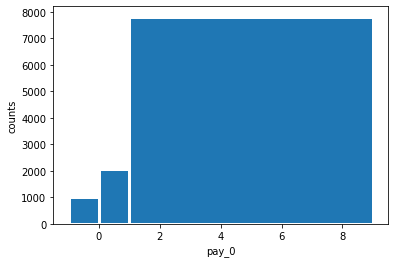

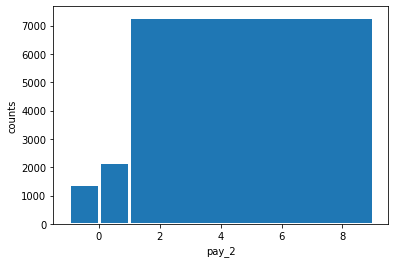

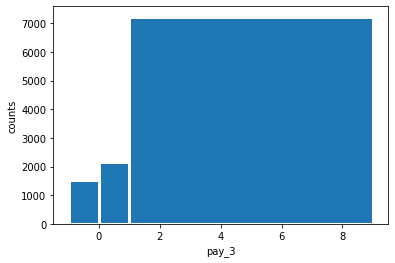

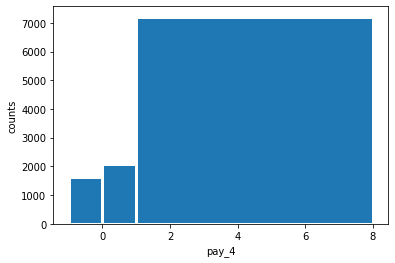

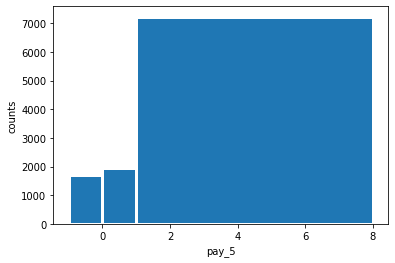

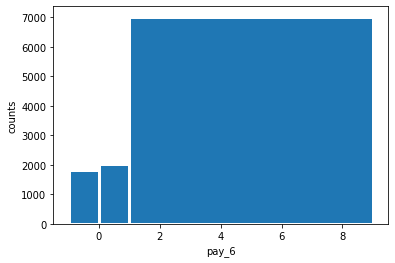

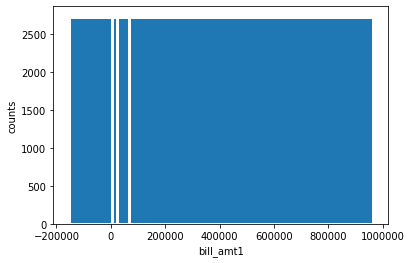

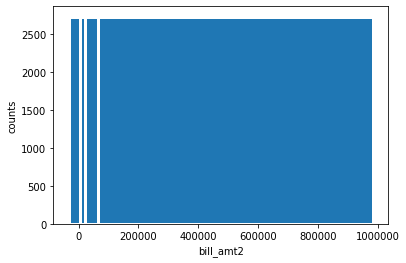

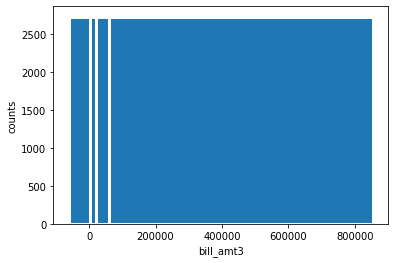

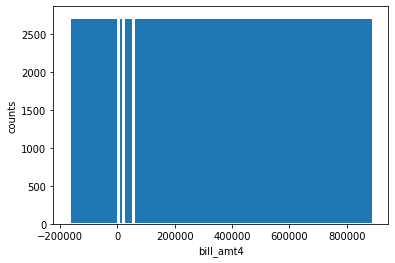

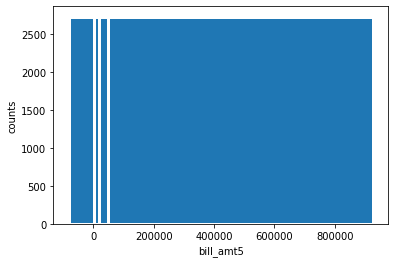

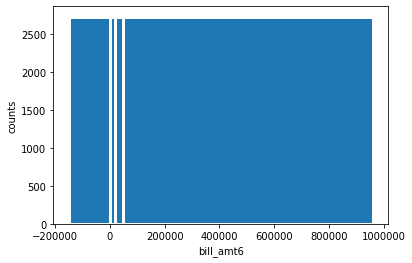

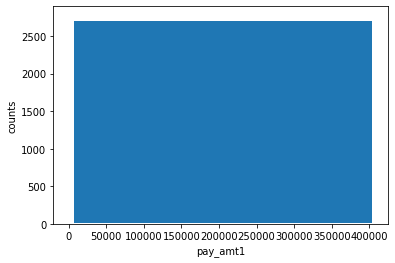

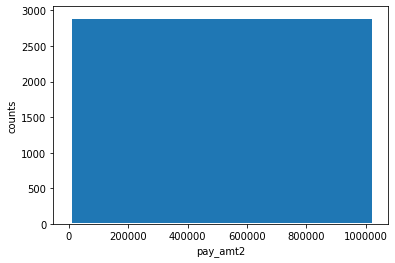

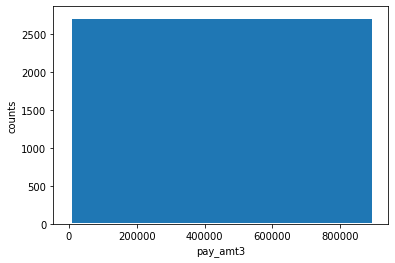

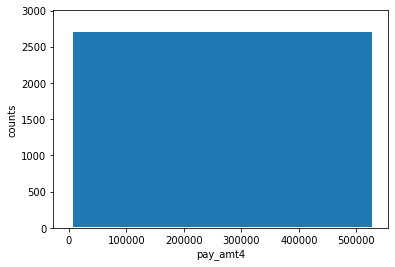

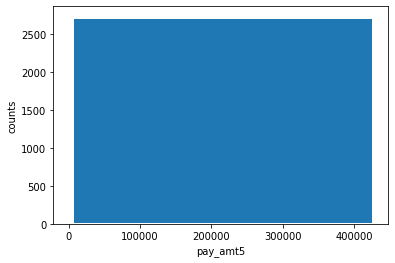

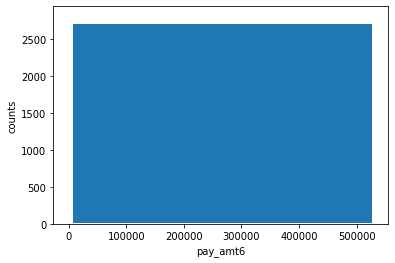

In [11]:
show_tiles_features(dataset_which_fail, tiles=4)